C:\Users\User\AppData\Local\Temp\ipykernel_968\1602390838.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


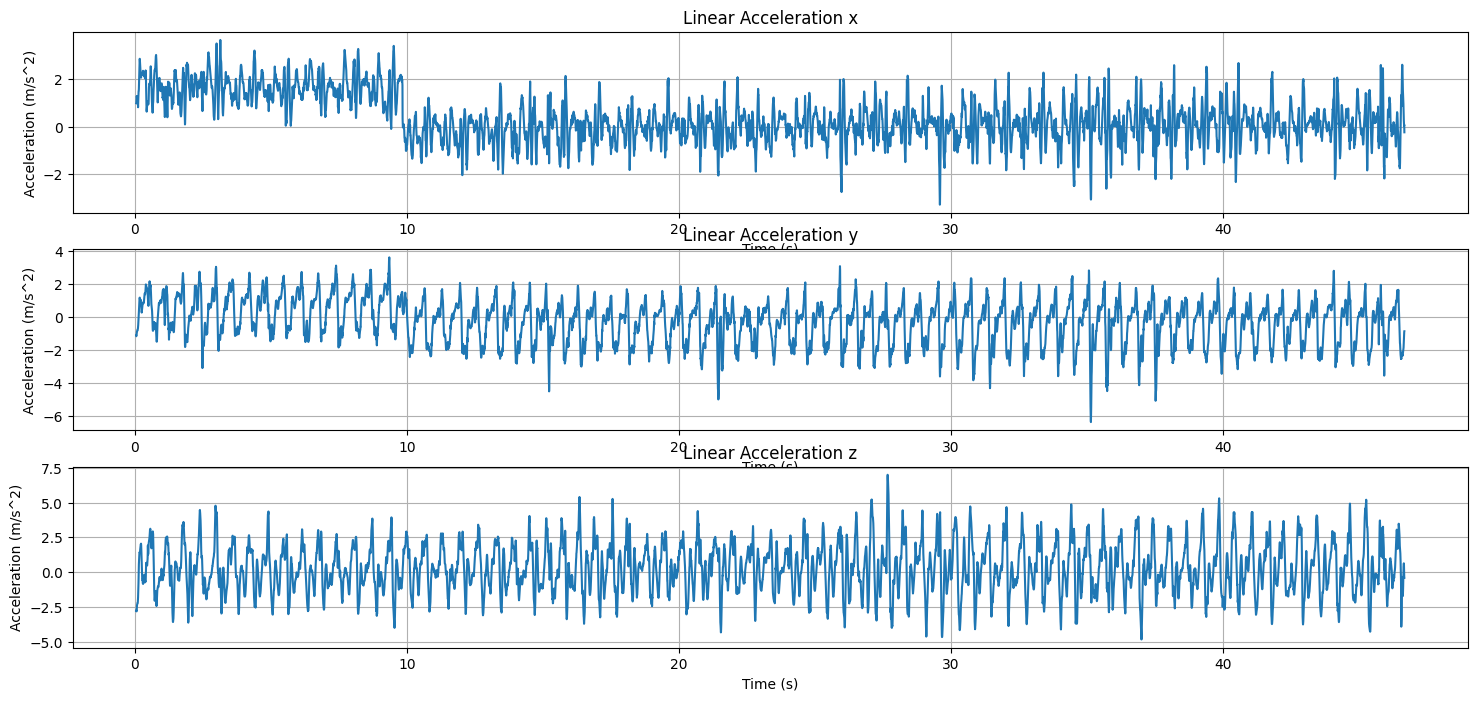

Number of steps:  74.5


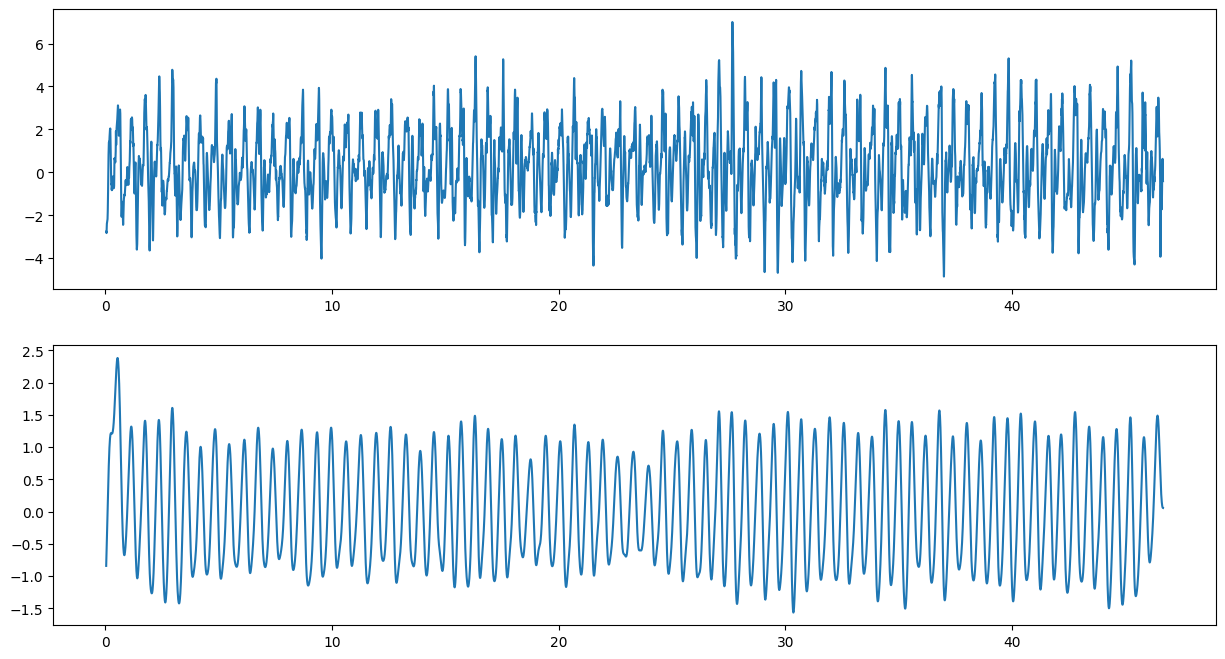

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
# Load the acceleration data into a DataFrame (assuming it's in CSV format)
df = pd.read_csv('steps_accel.csv')
df.head()
plt.figure(figsize=(18, 8))
plt.subplot(3,1,1)
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], label='X Component')
plt.grid()  
plt.title('Linear Acceleration x')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.subplot(3,1,2)
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], label='Y Component')
plt.grid()
plt.title('Linear Acceleration y')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.subplot(3,1,3)
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], label='Z Component')
plt.grid()
plt.title('Linear Acceleration z')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.show()
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    
    return y
def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    
    return y
#filter the data
noisy_signal =df['Linear Acceleration z (m/s^2)']
time = df['Time (s)']
order = 2
dt = (time[len(time)-1]-time[0])/len(time)
fs = 1/dt
nyq = 0.5 * fs
cutoff_H = 1/5
cutoff_L = 1/0.5

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order)

plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
plt.plot(time, noisy_signal, label='Noisy Signal')
plt.subplot(2,1,2)
plt.plot(time, final_signal, label='Filtered Signal')
stepdata = final_signal
steps = 0
# for i in range(1,len(stepdata)-1):
#     if stepdata[i]/stepdata[i+1]<0:
#         steps += 0.5
for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1]<0:
        steps += 0.5
print("Number of steps: ", steps)